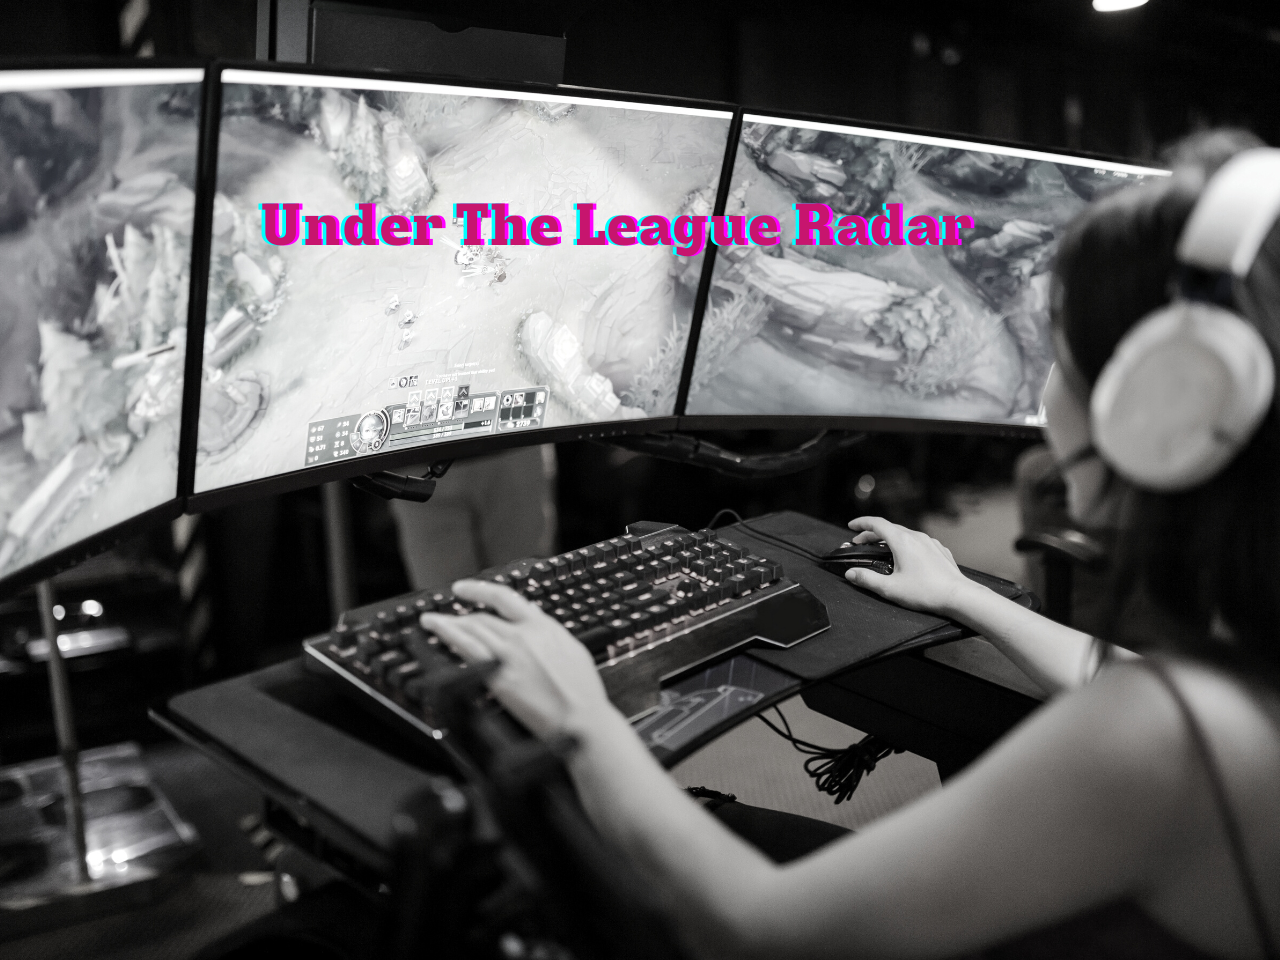

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle as kaggle
from IPython import display
display.Image("UTLR.jpg")

-------

# What is League of Legends?
League of Legends (LoL), commonly referred to as League, is a 2009 multiplayer online battle arena video game developed and published by Riot Games. Inspired by Defense of the Ancients, a custom map for Warcraft III, Riot's founders sought to develop a stand-alone game in the same genre. Since its release in October 2009, League has been free-to-play and is monetized through purchasable character customization. The game is available for Microsoft Windows and macOS.

In the game, two teams of five players battle in player-versus-player combat, each team occupying and defending their half of the map. Each of the ten players controls a character, known as a "champion", with unique abilities and differing styles of play. During a match, champions become more powerful by collecting experience points, earning gold, and purchasing items to defeat the opposing team. In League's main mode, Summoner's Rift, a team wins by pushing through to the enemy base and destroying their "Nexus", a large structure located within.

# Who is this notebook for?
> 1. Data Scientists/Analysts that are gamers at heart.

> 2. Beginner and Intermediate League of Legends players that do not care about the meta of the game.

> 3. League of Legends players that want to main a champion , but have no idea where to start.

# What is the purpose of this Notebook?
To give the avid League of Legends (LoL) player an idea on which champion would positively affect their gaming experience by:
> 1. Analysing the most commonly played Lane.

> 2. Analysing the champion with the lowest Ban Rate.

> 3. Using data to pick a champion that has a Low Ban Rate as well as a satisfactory Win Rate.

-------

# Data Preprocessing Stage
Here, we import the csv file and remove the "%" character as it would interfere with future function.

We also group up the different Roles in League of Legends for future visualizations into :

> ADC = The “AD Carry” champions attack from a distance. Their ultimate goal is to be able to eliminate enemies with ease and to be one of the champions is to do more damage in the game.

> JUNGLE = The Jungler is in charge of supporting each of the other lines and collecting the jungle boosts. It is a style of support although with other characteristics that make it a more versatile role. 

> MID = When in mid, champions with mage characteristics or similar skills are often used. Although some champions like Talon break this mold. They are also known as AP Carrys because they climb with Ability Power. So, to sum up, the most important features of a mid-lanner are attack and speed.

> SUPPORT = The support is the companion of the ADC and the subsequent help of the whole team. He is in charge of having vision all over the field and protecting his teammates throughout the game.

> Top = The players in the top League of Legends positions generally choose strong champions, who have enough life and can eventually help his team roll. Top is the most versatile as it allows you to do some solo-play in the early game and then work as a backup if other lanes need you.

In [3]:
lol = pd.read_csv('League of Legends Champion Stats 12.11.csv', header=0 )
lol.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,God,69.36,3.20,48.94%,92.64%,7.31%,5.43%,1.96
1,Ahri,Mage,MID,God,73.72,-5.74,50.04%,95.11%,9.83%,8.59%,2.63
2,Akali,Assassin,MID,S,58.67,2.63,48.70%,68.12%,6.26%,11.79%,2.39
3,Akali,Assassin,TOP,B,43.83,-0.89,47.58%,30.92%,2.67%,11.79%,2.05
4,Akshan,Marksman,MID,B,46.91,-0.64,49.50%,58.88%,2.93%,7.60%,2.22


In [4]:
lol["Win %"] = lol["Win %"].str[:-1]
lol["Role %"] = lol["Role %"].str[:-1]
lol["Pick %"] = lol["Pick %"].str[:-1]
lol["Ban %"] = lol["Ban %"].str[:-1]
lol[['Win %','Role %', 'Pick %', 'Ban %']] = lol[['Win %','Role %', 'Pick %', 'Ban %']].apply(pd.to_numeric)
lol.sort_values(by='Ban %')

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
148,Ryze,Mage,MID,D,36.42,9.02,46.06,79.84,1.96,0.13,2.16
149,Ryze,Mage,TOP,D,22.99,1.65,44.52,16.59,0.41,0.14,1.79
106,Maokai,Tank,SUPPORT,C,37.94,-3.47,49.05,70.95,1.22,0.15,2.17
107,Maokai,Tank,TOP,D,28.33,-4.73,46.36,22.21,0.41,0.15,2.05
167,Skarner,Fighter,JUNGLE,A,51.24,12.92,52.39,75.95,0.84,0.19,3.05
...,...,...,...,...,...,...,...,...,...,...,...
217,Wukong,Fighter,JUNGLE,S,64.88,-26.51,52.94,76.81,8.18,25.59,2.93
229,Yuumi,Support,SUPPORT,God,94.89,18.06,50.58,98.46,13.33,28.71,4.37
232,Zed,Assassin,MID,God,67.98,-3.42,48.20,73.40,7.34,28.72,2.34
233,Zed,Assassin,JUNGLE,B,42.46,0.90,47.03,21.98,2.01,28.72,2.58


In [5]:
lol_ADC = lol.loc[lol['Role'] == 'ADC'].reset_index()
lol_JG = lol.loc[lol['Role'] == 'JUNGLE'].reset_index()
lol_MID = lol.loc[lol['Role'] == 'MID'].reset_index()
lol_SUP = lol.loc[lol['Role'] == 'SUPPORT'].reset_index()
lol_TOP = lol.loc[lol['Role'] == 'TOP'].reset_index()

-------

# Data Visualization Stage

First order of business is to group up all the champions into their respective roles. That way , we will have a basic understanding of the distribution of roles in League of Legends.

> ##### It turns out that Top and Mid roles are the most popular with a discrepancy of 1 champion.

In [6]:
count_role = lol.groupby('Role').Name.count().reset_index()
count_role

,Role,Name
0,ADC,28
1,JUNGLE,48
2,MID,61
3,SUPPORT,42
4,TOP,62


Below, we have a Pie Chart that better represents the relationships of the roles to each other. Notice how  Top and Mid roles have a 0.42% difference, further solidifying how both these roles are the most popular.

Notice how ADC has the lowest percentage. This is because ADC is seen as one of the hardest roles in League of Legends.

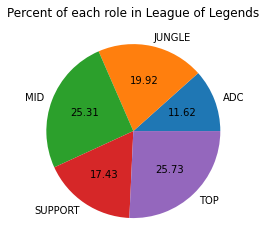

In [7]:
palette_color = sns.color_palette('bone')
plt.pie(count_role.Name, labels = count_role.Role,autopct='%.2f')
plt.title('Percent of each role in League of Legends')
plt.show()

Below, we used regression to better understand the relationship of KDA(Kills/Deaths/Assists) and Win Rate. Of course, the findings are not surprising. In most video games, players are incentivised to be more active. However, League is not an ordinary game. You can win a match and still get a *low* KDA score and lose a match and have the *highest* KDA on your team. We will focus on Champions with a winrate higher than 50% to maximise our chances of going up in the ranks.

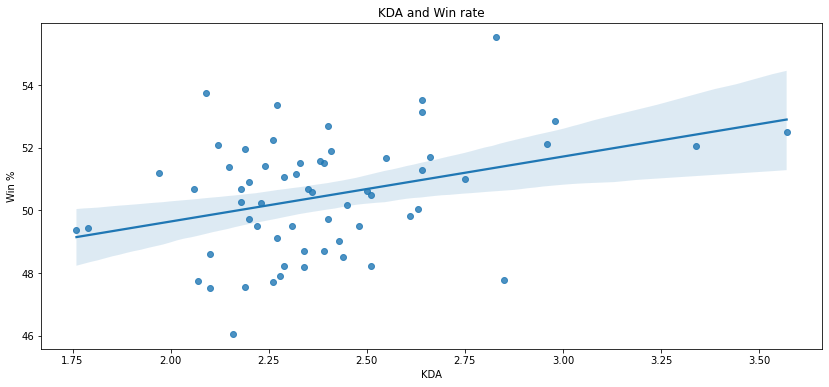

In [19]:
plt.figure(figsize=(14,6))
lolgraph = sns.regplot(x='KDA',y='Win %', data=lol_MID)
plt.title('KDA and Win rate')
lolgraph.set_ylim(None, None)
plt.show()

-------

# Role EDA

The worst feeling (apart from losing a match) is having your champion banned during the Draft Pick process. We will be prioritizing ban rates on the lower side as the most "meta" champions have the highest ban rate as nobody wants to go up against a Yasuo main as Ahri.

> NB = I will be choosing from a list of 10 champions and will give my reason as to why I made that decision.

In [22]:
lol_TOP_copy = lol_TOP.copy()
lol_TOP_copy = lol_TOP_copy.sort_values(by=['Ban %'], ascending =True).reset_index()
lol_TOP_copy.head(10)

,level_0,index,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,38,149,Ryze,Mage,TOP,D,22.99,1.65,44.52,16.59,0.41,0.14,1.79
1,25,107,Maokai,Tank,TOP,D,28.33,-4.73,46.36,22.21,0.41,0.15,2.05
2,45,168,Skarner,Fighter,TOP,B,43.75,14.22,53.14,21.33,0.22,0.19,2.45
3,37,147,Rumble,Fighter,TOP,C,36.54,1.01,48.19,53.03,1.20,0.44,2.12
4,39,152,Sejuani,Tank,TOP,B,46.80,13.76,52.44,33.68,1.12,0.44,2.45
5,19,71,Jayce,Fighter,TOP,C,42.19,-1.53,48.29,81.69,2.69,0.45,1.81
6,12,52,Gragas,Fighter,TOP,B,43.30,9.19,48.42,48.05,2.43,0.46,2.16
7,21,87,Kennen,Mage,TOP,C,38.30,7.83,48.95,77.59,1.38,0.47,2.01
8,11,49,Gnar,Fighter,TOP,A,50.36,2.45,49.48,96.33,3.61,0.70,1.99
9,41,160,Shen,Tank,TOP,S,63.86,-0.30,52.73,87.67,3.64,0.70,3.08


In [10]:
Shen = lol.loc[lol['Name'] == 'Shen'].reset_index()
Shen

,index,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,160,Shen,Tank,TOP,S,63.86,-0.3,52.73,87.67,3.64,0.7,3.08


I chose *Shen* because he has a KDA of 3.08 , which shows that he has killing potential and has a ban rate sub 1% . This means that if you play 1000 league matches, you will only be banned 7 times in total. Having a S tier grading ,further solidifies my confidence in my decision as the other champions have a grade of D-A.

-------

In [11]:
lol_MID_copy = lol_MID.copy()
lol_MID_copy = lol_MID_copy.sort_values(by=['Ban %'], ascending =True).reset_index()
lol_MID_copy.head(10)

,level_0,index,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,37,148,Ryze,Mage,MID,D,36.42,9.02,46.06,79.84,1.96,0.13,2.16
1,32,125,Orianna,Mage,MID,A,51.13,-3.34,51.02,93.12,2.77,0.19,2.75
2,47,195,Twisted Fate,Mage,MID,B,44.19,-3.20,47.90,90.45,3.15,0.24,2.28
3,48,199,Varus,Marksman,MID,C,37.94,-0.79,49.11,13.56,0.45,0.25,2.27
4,10,30,Corki,Marksman,MID,B,43.44,1.19,49.52,92.08,1.90,0.28,2.31
5,58,235,Ziggs,Mage,MID,C,42.28,-4.34,50.18,35.55,0.91,0.34,2.45
6,5,16,Aurelion Sol,Mage,MID,B,43.28,1.43,50.50,87.19,0.94,0.34,2.51
7,14,44,Galio,Tank,MID,B,46.03,-2.55,49.82,78.48,2.07,0.34,2.61
8,24,86,Kennen,Mage,MID,B,43.37,3.49,51.89,18.30,0.30,0.41,2.41
9,36,146,Rumble,Fighter,MID,A,49.09,6.11,53.51,33.14,0.79,0.44,2.64


In [12]:
Orianna = lol.loc[lol['Name'] == 'Orianna'].reset_index()
Orianna

,index,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,125,Orianna,Mage,MID,A,51.13,-3.34,51.02,93.12,2.77,0.19,2.75


I chose *Orianna* due to her amazing skills as a mage. Her shield allows her to avoid getting poked by the opposition. Orianna is a champion for people that want a comfortable and safe laning phase. This is a perfect champion for beginners in the League world.

-------

In [13]:
lol_JG_copy = lol_JG.copy()
lol_JG_copy = lol_JG_copy.sort_values(by=['Ban %'], ascending =True).reset_index()
lol_JG_copy.head(10)

,level_0,index,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,34,167,Skarner,Fighter,JUNGLE,A,51.24,12.92,52.39,75.95,0.84,0.19,3.05
1,12,68,Jarvan IV,Tank,JUNGLE,A,48.13,5.75,49.41,87.11,1.93,0.25,3.20
2,37,186,Taric,Support,JUNGLE,B,47.42,0.00,50.96,10.11,0.26,0.29,2.90
3,11,65,Ivern,Support,JUNGLE,C,40.26,2.89,45.79,76.31,1.02,0.36,3.09
4,31,151,Sejuani,Tank,JUNGLE,A,51.71,10.97,51.28,58.48,1.96,0.44,3.28
5,7,50,Gragas,Fighter,JUNGLE,A,50.53,21.83,51.55,28.02,1.27,0.46,3.10
6,4,38,Elise,Mage,JUNGLE,C,40.42,10.76,47.02,90.53,1.40,0.61,2.51
7,39,197,Udyr,Fighter,JUNGLE,B,46.58,11.01,49.59,91.93,2.08,0.63,2.72
8,0,7,Amumu,Tank,JUNGLE,B,46.12,6.63,49.58,84.30,1.99,0.82,2.64
9,45,222,Xin Zhao,Fighter,JUNGLE,B,44.19,10.35,48.73,88.67,2.82,0.93,2.29


In [14]:
Sejuani = lol.loc[lol['Name'] == 'Sejuani'].reset_index()
Sejuani

,index,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,151,Sejuani,Tank,JUNGLE,A,51.71,10.97,51.28,58.48,1.96,0.44,3.28
1,152,Sejuani,Tank,TOP,B,46.80,13.76,52.44,33.68,1.12,0.44,2.45


The reason for me choosing *Sejuani* is purely because of the fact that Sejuani is a tank and has great crowd control. Iniating ganks will be no problem with this champion averaging 3.28 KDA.

>Side Note = Sejuani is only good in the mid/late game, so be sure to play the early game cautiously.

-------

In [15]:
lol_SUP_copy = lol_SUP.copy()
lol_SUP_copy = lol_SUP_copy.sort_values(by=['Ban %'], ascending =True).reset_index()
lol_SUP_copy.head(10)

,level_0,index,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,18,106,Maokai,Tank,SUPPORT,C,37.94,-3.47,49.05,70.95,1.22,0.15,2.17
1,26,139,Rell,Tank,SUPPORT,C,38.59,-5.60,48.68,98.34,1.34,0.28,2.44
2,31,169,Sona,Support,SUPPORT,A,51.70,-5.04,51.70,96.47,3.63,0.32,2.95
3,9,45,Galio,Tank,SUPPORT,C,38.58,1.80,49.96,18.49,0.46,0.34,2.42
4,8,23,Braum,Support,SUPPORT,B,42.98,-4.81,49.22,97.99,2.11,0.34,2.83
5,35,185,Taric,Support,SUPPORT,A,52.20,18.28,54.29,81.52,2.09,0.34,2.90
6,11,66,Ivern,Support,SUPPORT,D,22.55,-10.81,41.49,11.06,0.15,0.36,2.37
7,25,136,Rakan,Support,SUPPORT,S,55.79,11.94,50.43,98.11,6.15,0.45,2.92
8,5,18,Bard,Support,SUPPORT,A,49.17,-2.22,50.12,94.91,3.67,0.62,2.98
9,0,6,Alistar,Tank,SUPPORT,B,43.00,0.66,49.22,95.98,2.64,0.64,2.46


In [16]:
Sona = lol.loc[lol['Name'] == 'Sona'].reset_index()
Sona

,index,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,169,Sona,Support,SUPPORT,A,51.7,-5.04,51.7,96.47,3.63,0.32,2.95


Sona is the Mercy(From OverWatch) of League of Legends. Healing and Shielding will be the name of the game. However, do not be afraid to pick up a few kills here and there as she has an average KDA of 2.95.

-------

In [17]:
lol_ADC_copy = lol_ADC.copy()
lol_ADC_copy = lol_ADC_copy.sort_values(by=['Ban %'], ascending =True).reset_index()
lol_ADC_copy.head(10)

,level_0,index,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,21,200,Varus,Marksman,ADC,D,34.84,1.02,49.96,84.02,2.74,0.23,2.34
1,27,236,Ziggs,Mage,ADC,D,35.08,7.31,51.29,57.15,1.39,0.32,2.54
2,16,166,Sivir,Marksman,ADC,D,34.58,-0.51,50.01,94.70,2.46,0.63,2.40
3,5,61,Heimerdinger,Mage,ADC,D,28.61,5.19,50.96,14.82,0.21,0.88,2.15
4,0,13,Aphelios,Marksman,ADC,D,32.60,1.84,46.64,96.92,5.11,0.90,1.99
5,24,219,Xayah,Marksman,ADC,B,42.63,-0.13,49.72,97.84,5.57,0.93,2.36
6,15,156,Seraphine,Mage,ADC,C,39.74,-1.26,52.07,18.15,1.66,1.42,2.89
7,7,74,Jinx,Marksman,ADC,A,50.61,-8.05,49.13,98.28,9.07,1.48,2.21
8,8,75,Kai'Sa,Marksman,ADC,God,65.83,-23.19,49.38,96.58,13.59,2.32,2.44
9,9,76,Kalista,Marksman,ADC,C,42.14,5.97,50.34,90.92,4.76,2.51,2.39


In [18]:
Seraphine = lol.loc[lol['Name'] == 'Seraphine'].reset_index()
Seraphine

,index,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,154,Seraphine,Mage,MID,A,52.78,4.31,52.86,18.06,1.80,1.42,2.98
1,155,Seraphine,Mage,SUPPORT,A,52.33,2.29,48.79,63.37,6.41,1.42,2.56
2,156,Seraphine,Mage,ADC,C,39.74,-1.26,52.07,18.15,1.66,1.42,2.89


This might be an unconventional pick as Kai'Sa is much better as an ADC with a win rate of 65.83. However, I prefer Serphine as she has the potential to beat Kai'Sa in a 1v1. Seraphine has a KDA of 2.89 as an ADC and a KDA of 2.98 as a Mid laner. 

> You **will** be winning matches with Seraphine if you have the correct build.

------

# BONUS CONTENT

Below is a table of upgrade sequences for the champions chosen above. Use these Sequences to get a feel for the champions and main someone. 

> Have fun!

| Name | Upgrade Sequence | Role | Win % |
| ---- | ---------------- | ---- | ----- |
| Shen | QEWQQRQEQEREEWWRWW | TOP | 52.73% |
| Orianna | QWEQQRQWQWRWWEEREE | MID | 51.02% |
| Sejuani | EWQWWRWQWQRQQEEREE | JUNGLE | 51.28% |
| Sona | QWEWWRWQWQRQQEEREE | SUPPORT | 51.7% |
| Seraphine | QEWQQRQWQWRWWEEREE | ADC | 52.07% |

------